In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import decomposition
import matplotlib.pyplot as plt
from pathlib import Path

### Feature inspection of principal component #1 

In [ ]:
exp_suffix = '3manu_pseudo0_c_30' #suffix for specific label bias experiment. i.e. 3manu_fuji_c_30, 3manu_gems_c_30, ...
Path(f'/vol/biomedic3/es525/mammo-label_bias/figs/{exp_suffix}').mkdir(parents=True, exist_ok=True)

In [55]:
num_features = 512

In [ ]:
# clean label baseline embeddings (for plot overlay)
df_clean = pd.read_csv('modified_metadata/embed-non-negative_singledensity_3manu_pseudo_balanced.csv') # clean

df_clean['image_id'] = [img_path.split('/')[-1] for img_path in df_clean.image_path.values]

prd_path_clean = f'/vol/biomedic3/es525/mammo-label-bias/output-density/resnet18-b32-fixed-alpha-1.0-ffdm-lr-0.00001-binary_singledensity_3manu_pseudo_balanced' #clean

df_prd_clean = pd.read_csv(os.path.join(prd_path_clean, 'predictions.csv'))
df_emb_clean = pd.read_csv(os.path.join(prd_path_clean, 'embeddings.csv'))

df_clean = pd.merge(pd.concat([df_emb_clean, df_prd_clean], axis=1), df_clean, how='inner', on=['image_id'])

embeddings_clean = np.array(df_clean.iloc[:,0:num_features])
print(embeddings_clean.shape)

pca_clean = decomposition.PCA(n_components=0.95, whiten=False, random_state=42)
embeddings_pca_clean = pca_clean.fit_transform(embeddings_clean)

print(embeddings_pca_clean.shape)

df_clean['PCA 1'] = embeddings_pca_clean[:,0]

/tmp/ipykernel_1749468/1591885473.py:2: DtypeWarning: Columns (31,32,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('modified_metadata/embed-non-negative_singledensity_3manu_pseudo_balanced.csv') # clean


(38538, 512)
(38538, 192)


In [ ]:
# label bias embeddings 

df = pd.read_csv(f'/vol/biomedic3/es525/mammo-label-bias/modified_metadata/labelbias_subjectlevel_{exp_suffix}.csv') # subject level


df['image_id'] = [img_path.split('/')[-1] for img_path in df.image_path.values]


prd_path = f'/vol/biomedic3/es525/mammo-label-bias/output-density-subject-labelbias/resnet18-b32-fixed-alpha-1.0-ffdm-lr-0.00001-binary-{exp_suffix}' # subject level

df_prd = pd.read_csv(os.path.join(prd_path, 'predictions.csv'))
df_emb = pd.read_csv(os.path.join(prd_path, 'embeddings.csv'))

df = pd.merge(pd.concat([df_emb, df_prd], axis=1), df, how='inner', on=['image_id'])

embeddings = np.array(df.iloc[:,0:num_features])
print(embeddings.shape)

pca = decomposition.PCA(n_components=0.95, whiten=False, random_state=42)
embeddings_pca = pca.fit_transform(embeddings)

print(embeddings_pca.shape)

df['PCA 1'] = embeddings_pca[:,0]

/tmp/ipykernel_1749468/215340272.py:3: DtypeWarning: Columns (31,32,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'/vol/biomedic3/es525/mammo-net/modified_metadata/labelbias_subjectlevel_{exp_suffix}.csv') # subject level


(38538, 512)
(38538, 202)


In [58]:
alpha = 0.6
alpha_outline = 0.8
style = '.'
markersize = 20
color_palette = 'tab10'
kind = 'scatter'
markerscale = 3
linewidth = 0
linewidth_outline = 1.5
bw_adjust = 1.2
x_min = -21
x_max = 23
y_min = 0
y_max_multi = 0.35
# y_max_binary = 0.25
label_fontsize = 13
title_fontsize = 14
tick_fontsize = 10

x = 'PCA 1'

In [59]:
def plot_kde(data, hue, x, y_max, palette):
    hue_order = list(data[hue].unique())
    hue_order.sort()
    sns.set_theme(style="white")
    ax = sns.kdeplot(data=data, x=x, hue=hue, hue_order=hue_order, alpha=alpha, palette=palette, bw_adjust = bw_adjust, linewidth = linewidth, common_norm=False, fill=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), markerscale=markerscale)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    ax.set_xlabel(ax.get_xlabel(), fontsize=label_fontsize) 
    ax.set_ylabel("Probability Density", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


def plot_kde_outline(data, hue, x, y_max, palette):
    hue_order = list(data[hue].unique())
    hue_order.sort()
    sns.set_theme(style="white")
    ax = sns.kdeplot(data=data, x=x, hue=hue, hue_order=hue_order, alpha=alpha_outline, palette=palette, bw_adjust = bw_adjust, linewidth = linewidth_outline, ls='--', common_norm=False, fill=False)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), markerscale=markerscale)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    ax.set_xlabel(ax.get_xlabel(), fontsize=label_fontsize) 
    ax.set_ylabel("Probability Density", fontsize=label_fontsize)  
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize) 

Below, we plot each subgroup's distribution for a given label bias scenario

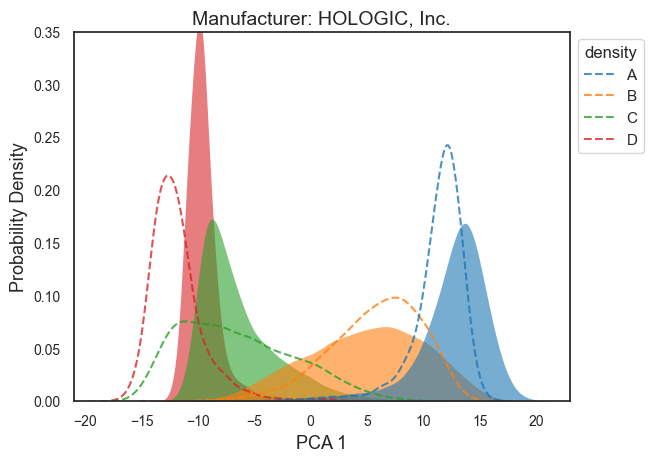

In [ ]:
attribute = 'density'
subgroup = 'HOLOGIC, Inc.'

plot_kde(df[df['Manufacturer']==subgroup], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['Manufacturer']==subgroup], attribute, x, y_max_multi, color_palette)


plt.title(f'Manufacturer: {subgroup}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/holo_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/holo_density.png', dpi=800, bbox_inches='tight')

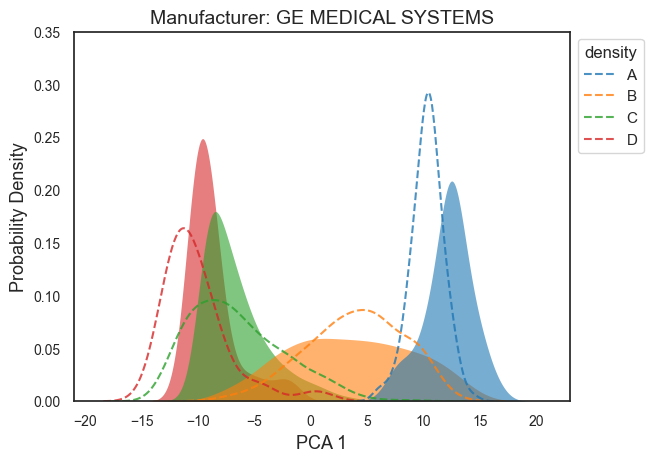

In [ ]:
attribute = 'density'
subgroup = 'GE MEDICAL SYSTEMS'

plot_kde(df[df['Manufacturer']==subgroup], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['Manufacturer']==subgroup], attribute, x, y_max_multi, color_palette)

plt.title(f'Manufacturer: {subgroup}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/gems_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/gems_density.png', dpi=800, bbox_inches='tight')

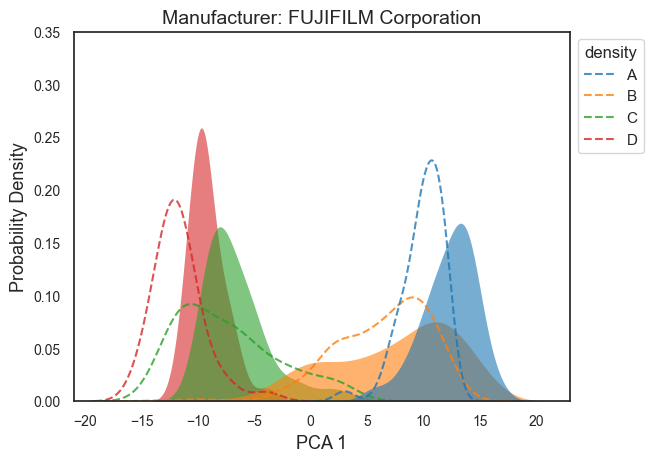

In [ ]:
attribute = 'density'
subgroup = 'FUJIFILM Corporation'

plot_kde(df.loc[(df['Manufacturer']==subgroup)], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['Manufacturer']==subgroup], attribute, x, y_max_multi, color_palette)

plt.title(f'Manufacturer: {subgroup}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/fuji_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/fuji_density.png', dpi=800, bbox_inches='tight')

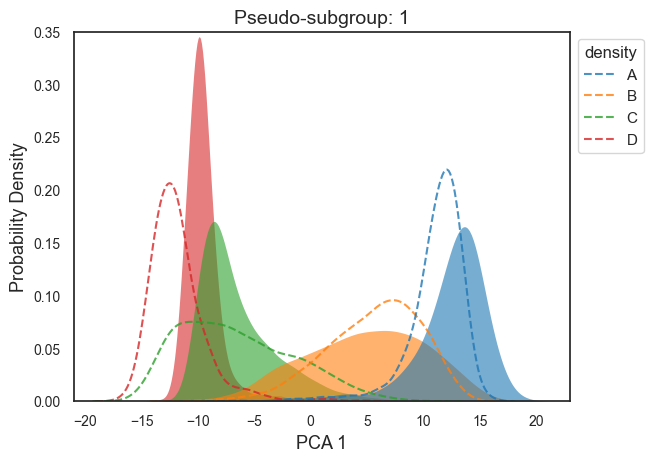

In [ ]:
attribute = 'density'
subgroup = 0

plot_kde(df.loc[(df['pseudo_subgroup']==subgroup)], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['pseudo_subgroup']==subgroup], attribute, x, y_max_multi, color_palette)

plt.title(f'Pseudo-subgroup: {subgroup+1}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo0_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo0_density.png', dpi=800, bbox_inches='tight')

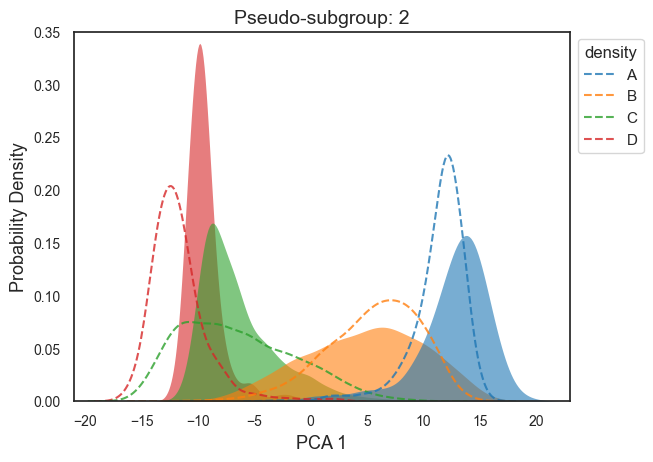

In [ ]:
attribute = 'density'
subgroup = 1

plot_kde(df.loc[(df['pseudo_subgroup']==subgroup)], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['pseudo_subgroup']==subgroup], attribute, x, y_max_multi, color_palette)

plt.title(f'Pseudo-subgroup: {subgroup+1}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo1_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo1_density.png', dpi=800, bbox_inches='tight')

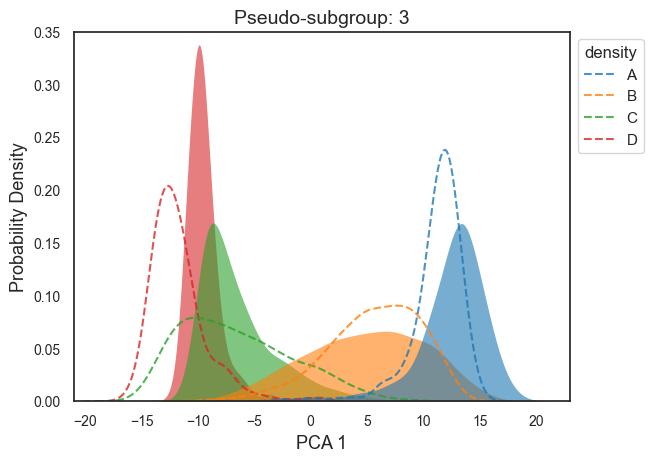

In [ ]:
attribute = 'density'
subgroup = 2

plot_kde(df.loc[(df['pseudo_subgroup']==subgroup)], attribute, x, y_max_multi, color_palette)
plot_kde_outline(df_clean[df_clean['pseudo_subgroup']==subgroup], attribute, x, y_max_multi, color_palette)

plt.title(f'Pseudo-subgroup: {subgroup+1}', fontsize=title_fontsize)
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo2_density.svg', bbox_inches='tight')
plt.savefig(f'/vol/biomedic3/es525/mammo-label-bias/figs_overlay/{exp_suffix}/pseudo2_density.png', dpi=800, bbox_inches='tight')